<a href="https://colab.research.google.com/github/suryate9ja/AI_Event/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
#Load libraries & import data
import pandas as pd
import numpy as np
import re
from datetime import datetime

# Read the data
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/002/856/original/scaler_clustering.csv')
df.columns = df.columns.str.lower()

print("Data shape:", df.shape)
df.head()


Data shape: (205843, 7)


,unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


In [50]:
#Structure & summary
print("Column types:")
print(df.dtypes)

# Convert to category if appropriate
for col in ['company_hash', 'job_position']:
    df[col] = df[col].astype('category')

print("\nMissing values per column:")
print(df.isna().sum())

print("\nNumeric summary:")
display(df.describe())

print("\nCategorical summary:")
display(df[['company_hash','job_position']].describe())


Column types:
unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

Missing values per column:
unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64

Numeric summary:


,unnamed: 0,orgyear,ctc,ctc_updated_year
count,205843.000000,205757.000000,2.058430e+05,205843.000000
mean,103273.941786,2014.882750,2.271685e+06,2019.628231
std,59741.306484,63.571115,1.180091e+07,1.325104
min,0.000000,0.000000,2.000000e+00,2015.000000
25%,51518.500000,2013.000000,5.300000e+05,2019.000000
50%,103151.000000,2016.000000,9.500000e+05,2020.000000
75%,154992.500000,2018.000000,1.700000e+06,2021.000000
max,206922.000000,20165.000000,1.000150e+09,2021.000000



Categorical summary:


,company_hash,job_position
count,205799,153279
unique,37299,1016
top,nvnv wgzohrnvzwj otqcxwto,Backend Engineer
freq,8337,43554


In [51]:
# Unique email counts
email_counts = df['email_hash'].value_counts()
print("Unique email_hash values:", email_counts.size)
print("\nTop 10 most frequent email_hashes:")
display(email_counts.head(10))


Unique email_hash values: 153443

Top 10 most frequent email_hashes:


,count
email_hash,
bbace3cc586400bbc65765bc6a16b77d8913836cfc98b77c05488f02f5714a4b,10
3e5e49daa5527a6d5a33599b238bf9bf31e85b9efa9a94f1c88c5e15a6f31378,9
298528ce3160cc761e4dc37a07337ee2e0589df251d73645aae209b010210eee,9
6842660273f70e9aa239026ba33bfe82275d6ab0d20124021b952b5bc3d07e6c,9
d598d6f1fb21b45593c2afc1c2f76ae9f4cb7167156cdf93246d4192a89d8065,8
b4d5afa09bec8689017d8b29701b80d664ca37b83cb883376b2e95191320da66,8
d15041f58bb01c8ee29f72e33b136e26bc32f3169a40b53d75fe7ae9cbb9a551,8
c0eb129061675da412b0deb15871dd06ef0d7cd86eb5f7e8cc6a20b0d1938183,8
4818edfd67ed8563dde5d083306485d91d19f4f1c95d193a1700e79dd245b75c,8


In [52]:
# Missing-value check & imputers
from sklearn.impute import SimpleImputer, KNNImputer

print(df.isna().sum())

# Prepare imputers
mean_imp = SimpleImputer(strategy='mean')
knn_imp  = KNNImputer(n_neighbors=5)


unnamed: 0              0
company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52564
ctc_updated_year        0
dtype: int64


In [53]:
# Regex cleaning
for col in ['company_hash','job_position']:
    df[col] = df[col].astype(str).apply(lambda s: re.sub('[^A-Za-z0-9 ]+', '', s))

# Show cleaned samples
df[['company_hash','job_position']].head(5)


,company_hash,job_position
0,atrgxnnt xzaxv,Other
1,qtrxvzwt xzegwgbb rxbxnta,FullStack Engineer
2,ojzwnvwnxw vx,Backend Engineer
3,ngpgutaxv,Backend Engineer
4,qxen sqghu,FullStack Engineer


In [54]:
# Drop duplicate rows
before = len(df)
df.drop_duplicates(inplace=True)
print(f"Dropped {before - len(df)} duplicates; new shape = {df.shape}")


Dropped 0 duplicates; new shape = (205843, 7)


In [55]:
# Years of Experience
df['orgyear'] = pd.to_datetime(df['orgyear'], errors='coerce').dt.year
current_year = datetime.now().year
df['years_of_experience'] = current_year - df['orgyear']

df[['orgyear','years_of_experience']].head(5)


,orgyear,years_of_experience
0,1970.0,55.0
1,1970.0,55.0
2,1970.0,55.0
3,1970.0,55.0
4,1970.0,55.0


In [56]:
# Prepare groupings
group_keys = ['company_hash','job_position','years_of_experience']
group_counts = df.groupby(group_keys).size().reset_index(name='group_size')
group_counts.head(5)


,company_hash,job_position,years_of_experience,group_size
0,0,Other,55.0,1
1,0,nan,55.0,1
2,0000,Other,55.0,1
3,01 ojztqsj,Android Engineer,55.0,1
4,01 ojztqsj,Frontend Engineer,55.0,1


In [57]:
# 5-point summary
summary = (
    df
    .groupby(group_keys)['ctc']
    .agg(count='count', mean='mean', median='median', min='min', max='max')
    .reset_index()
)
summary.rename(columns={'mean':'ctc_mean','median':'ctc_median','min':'ctc_min','max':'ctc_max'}, inplace=True)
summary.head(5)


,company_hash,job_position,years_of_experience,count,ctc_mean,ctc_median,ctc_min,ctc_max
0,0,Other,55.0,1,100000.0,100000.0,100000,100000
1,0,nan,55.0,1,100000.0,100000.0,100000,100000
2,0000,Other,55.0,1,300000.0,300000.0,300000,300000
3,01 ojztqsj,Android Engineer,55.0,1,270000.0,270000.0,270000,270000
4,01 ojztqsj,Frontend Engineer,55.0,1,830000.0,830000.0,830000,830000


In [58]:
# Merge & designation_flag
df = df.merge(summary, on=group_keys, how='left')
df['designation_flag'] = np.where(df['ctc'] > df['ctc_mean'], 1,
                          np.where(df['ctc'] < df['ctc_mean'], 3, 2))
df[['ctc','ctc_mean','designation_flag']].head(5)


,ctc,ctc_mean,designation_flag
0,1100000,1.085000e+06,1
1,449999,9.511363e+05,3
2,2000000,2.000000e+06,2
3,700000,1.500000e+06,3
4,1400000,8.466667e+05,1


In [59]:
# Dept-level Class flag
dept_mean = (
    df.groupby(['company_hash','job_position'])['ctc']
      .mean()
      .reset_index(name='dept_ctc_mean')
)
df = df.merge(dept_mean, on=['company_hash','job_position'], how='left')
df['class_flag'] = np.where(df['ctc'] > df['dept_ctc_mean'], 1,
                    np.where(df['ctc'] < df['dept_ctc_mean'], 3, 2))
df[['ctc','dept_ctc_mean','class_flag']].head(5)


,ctc,dept_ctc_mean,class_flag
0,1100000,1.085000e+06,1
1,449999,9.511363e+05,3
2,2000000,2.000000e+06,2
3,700000,1.500000e+06,3
4,1400000,8.466667e+05,1


In [60]:
# Company-level Tier flag
comp_mean = (
    df.groupby('company_hash')['ctc']
      .mean()
      .reset_index(name='comp_ctc_mean')
)
df = df.merge(comp_mean, on='company_hash', how='left')
df['tier_flag'] = np.where(df['ctc'] > df['comp_ctc_mean'], 1,
                   np.where(df['ctc'] < df['comp_ctc_mean'], 3, 2))
df[['ctc','comp_ctc_mean','tier_flag']].head(5)


,ctc,comp_ctc_mean,tier_flag
0,1100000,1.115667e+06,3
1,449999,2.193027e+06,3
2,2000000,2.000000e+06,2
3,700000,1.713929e+06,3
4,1400000,9.400000e+05,1


In [61]:
# Top/Bottom performers
top_tier1   = df[df['tier_flag']==1].nlargest(10, 'ctc')
bottom_tier3= df[df['tier_flag']==3].nsmallest(10, 'ctc')

ds = df[df['job_position'].str.contains('Data Science', case=False, na=False)]
top_class1  = ds[ds['class_flag']==1].nlargest(10, 'ctc')
bottom_class3 = ds[ds['class_flag']==3].nsmallest(10, 'ctc')

print("Top 10 Tier 1 overall:")
display(top_tier1[['email_hash','company_hash','ctc']])

print("Bottom 10 Tier 3 overall:")
display(bottom_tier3[['email_hash','company_hash','ctc']])

print("Top 10 Data Science Class 1:")
display(top_class1[['email_hash','company_hash','ctc']])

print("Bottom 10 Data Science Class 3:")
display(bottom_class3[['email_hash','company_hash','ctc']])


Top 10 Tier 1 overall:


,email_hash,company_hash,ctc
117636,5b4bed51797140db4ed52018a979db1e34cee49e27b488...,obvqnuqxdwgb,255555555
602,4368cc6185184b811c3a4b9cef05dd1e45a682a6e94056...,xzegojo,200000000
734,0f7322f8f4423e695df58edb4f002dac637d8de021373a...,vwwtznhqt,200000000
836,cda8d723438e81185d2ee8c348870a4612eea974cdb2db...,mqxonrtwgzt v bvyxzaqv sqghu wgbuvzj,200000000
909,aad581a532f319c76c6e73937572feed9867d5ee2f1093...,wgszxkvzn,200000000
1052,4f83774dfe4b97bfd0836463f3a573aa82725aa8e0f4a4...,otre tburgjta,200000000
1083,a071c4cd6d423e8d1841ba6133e6c4684f4eaba7dc1526...,vwwtznhqt,200000000
1241,82fbacc015757ee74efe763c3623dc751812af48c741ff...,nvnv wgzohrnvzwj otqcxwto,200000000
1303,5a62c4492a39b13d825bdd372b9891103252b816818b43...,xzegojo,200000000
1574,04e01c24282a7262949b2efa7f1b3663aad9bfe2649232...,lubgqsvz wyvot wg,200000000


Bottom 10 Tier 3 overall:


,email_hash,company_hash,ctc
135435,3505b02549ebe2c95840ac6f0a35561a3b4cbe4b79cdb1...,xzntqcxtfmxn,2
118236,f2b58aeed3c074652de2cfd3c0717a5d21d6fbcf342a78...,xzntqcxtfmxn,6
114164,23ad96d6b6f1ecf554a52f6e9b61677c7d73d8a409a143...,xzntqcxtfmxn,14
184946,b8a0bb340583936b5a7923947e9aec21add5ebc50cd60b...,xm,15
116946,f7e5e788676100d7c4146740ada9e2f8974defc01f571d...,hzxctqoxnj ge fvoyxzsngz,200
99419,b995d7a2ae5c6f8497762ce04dc5c04ad6ec734d70802a...,gjg,600
150682,9af3dca6c9d705d8d42585ccfce2627f00e1629130d14e...,zvz,600
171196,80ba0259f9f59034c4927cf3bd38dc9ce2eb60ff18135b...,nvnv wgzohrnvzwj otqcxwto,600
3403,78eaccdfacf1b3d73037a6e86451d6424369c0d426feb4...,bgqsvz onvzrtj,1000
3908,5756870d895deca920251df2377dad261084904a4f9d10...,sggsrt,1000


Top 10 Data Science Class 1:


,email_hash,company_hash,ctc


Bottom 10 Data Science Class 3:


,email_hash,company_hash,ctc


In [62]:
# Top 10 with 5/6/7 yrs exp per company
for yrs in [5,6,7]:
    print(f"\n=== Year = {yrs} ===")
    sub = df[df['years_of_experience']==yrs]
    for comp, grp in sub.groupby('company_hash'):
        top5 = grp[grp['tier_flag']==1].nlargest(10,'ctc')
        if not top5.empty:
            print(f"\nCompany: {comp}")
            display(top5[['email_hash','ctc']])



=== Year = 5 ===

=== Year = 6 ===

=== Year = 7 ===


In [63]:
# Top 10 companies by avg CTC
avg_by_comp = df.groupby('company_hash')['ctc'].mean().nlargest(10)
print("Top 10 companies by avg CTC:")
display(avg_by_comp.reset_index().rename(columns={'ctc':'avg_ctc'}))


Top 10 companies by avg CTC:


,company_hash,avg_ctc
0,whmxw rgsxwo uqxcvnt rxbxnta,1.000150e+09
1,aveegaxr xzntqzvnxgzvr hzxctqoxnj,2.500000e+08
2,aggovz mgmwvn xzaxv uqxcvnt rxbxnta,2.000000e+08
3,agyv tdnqvwg,2.000000e+08
4,ama uqgltwno rxbxnta,2.000000e+08
5,anaw tduqtoo rxbxnta,2.000000e+08
6,apvnxv,2.000000e+08
7,axctqoxexta tztqsj ogrhnxgzo ucn rna,2.000000e+08
8,bgax uqgltwn rxbxnta,2.000000e+08
9,bjnqvy tztqsj xzaxv ucn rna,2.000000e+08


In [64]:
# Top 2 positions in every company
pos_mean = df.groupby(['company_hash','job_position'])['ctc'].mean().reset_index()
top2_roles = (
    pos_mean
    .sort_values(['company_hash','ctc'], ascending=[True,False])
    .groupby('company_hash')
    .head(2)
)
print("Top 2 roles per company (by avg CTC):")
display(top2_roles)


Top 2 roles per company (by avg CTC):


,company_hash,job_position,ctc
0,0,Other,100000.0
1,0,nan,100000.0
2,0000,Other,300000.0
4,01 ojztqsj,Frontend Engineer,830000.0
3,01 ojztqsj,Android Engineer,270000.0
...,...,...,...
71293,zz,nan,500000.0
71294,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer,600000.0
71295,zzb ztdnstz vacxogqj ucn rna,nan,600000.0
71296,zzgato,nan,130000.0


In [65]:
# Encoding & scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label-encode
le_comp = LabelEncoder().fit(df['company_hash'])
le_job  = LabelEncoder().fit(df['job_position'])
df['company_le'] = le_comp.transform(df['company_hash'])
df['job_le']     = le_job.transform(df['job_position'])

# Scale
scaler = StandardScaler()
df[['ctc_scaled','yoe_scaled']] = scaler.fit_transform(df[['ctc','years_of_experience']])

df[['company_le','job_le','ctc_scaled','yoe_scaled']].head(5)


,company_le,job_le,ctc_scaled,yoe_scaled
0,969,454,-0.099288,0.0
1,19730,289,-0.154369,0.0
2,15512,138,-0.023022,0.0
3,12108,138,-0.133184,0.0
4,20226,289,-0.073866,0.0


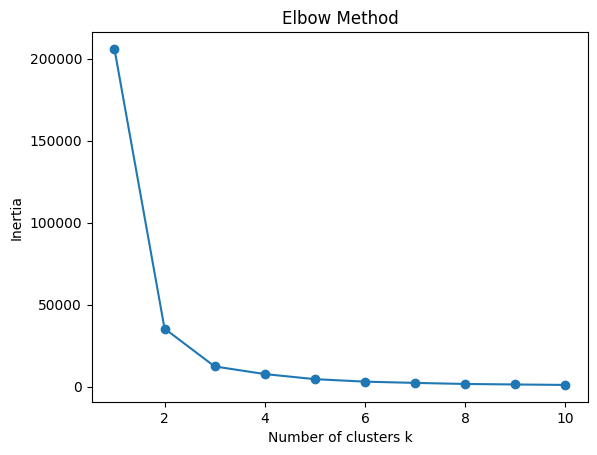

In [66]:
# Elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import SimpleImputer

X = df[['ctc_scaled','yoe_scaled']]
inertia = []

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)


for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_imputed) # Use X_imputed and set n_init
    inertia.append(km.inertia_)

plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.show()

In [48]:
# K-Means clustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

k = 3
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_imputed)
df['kmeans_cluster'] = kmeans.labels_
score = silhouette_score(X_imputed, df['kmeans_cluster'])
print(f"Silhouette score for k={k}: {score:.3f}")

Silhouette score for k=3: 0.984


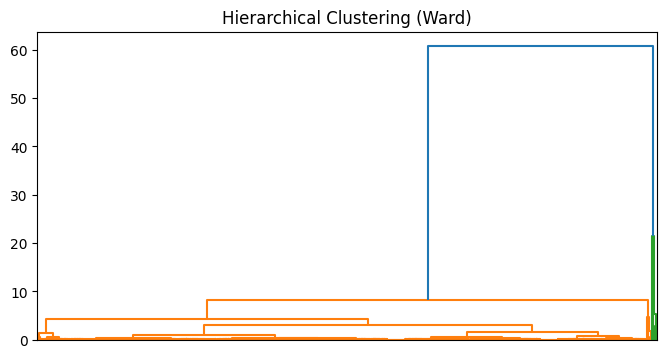

In [67]:
# Hierarchical clustering dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

# sample if needed:
sample = df.sample(n=2000, random_state=42)[['ctc_scaled','yoe_scaled']]
linked = linkage(sample, method='ward')

plt.figure(figsize=(8,4))
dendrogram(linked, no_labels=True)
plt.title('Hierarchical Clustering (Ward)')
plt.show()


In [68]:
# Actionable insights & recommendations
print("🔹 Tier-1 employees are top earners—consider special recognition or retention bonuses.")
print("🔹 Tier-3 employees may need compensation review or upskilling initiatives.")
print("🔹 Class-1 in Data Science: potential mentors or leaders for DS projects.")
print("🔹 Analyze cluster segments to tailor hiring, training, and promotion policies.")
print("🔹 Use these insights in upcoming compensation cycle and workforce planning.")


🔹 Tier-1 employees are top earners—consider special recognition or retention bonuses.
🔹 Tier-3 employees may need compensation review or upskilling initiatives.
🔹 Class-1 in Data Science: potential mentors or leaders for DS projects.
🔹 Analyze cluster segments to tailor hiring, training, and promotion policies.
🔹 Use these insights in upcoming compensation cycle and workforce planning.
